# Classification
## MNIST Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

### Import Dataset from `sklearn.datasets`

In [2]:
mnist_df = pd.read_csv('mnist_784.csv')

In [3]:
mnist_df.head(20)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [4]:
len(mnist_df)

70000

There are 784 features for 28 X 28 pixel. Each feature identify a pixel. <br>
Let's visualize the first row of the dataset

In [5]:
first_row = mnist_df.iloc[0, :-1].values # extract the first row removing the last row which is target
first_row = np.array(first_row)
first_row

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [6]:
first_row.dtype

dtype('int64')

In [7]:
first_row_image = first_row.reshape(28,28)
first_row_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Visualizing Data

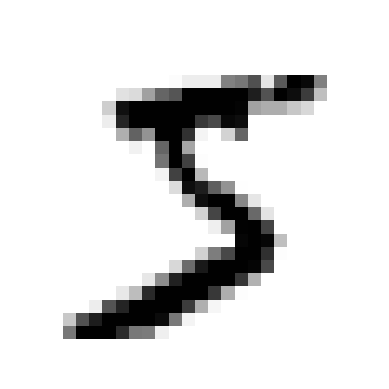

In [8]:
plt.imshow(first_row_image, cmap='binary')
plt.axis('off')
plt.show()

Let's visualize 2nd row

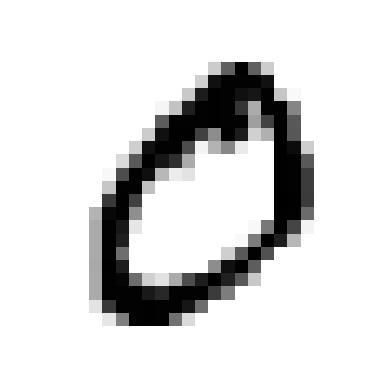

In [9]:
sec_row = mnist_df.iloc[1, :-1].values
sec_row = np.array(sec_row)
sec_row_image = sec_row.reshape(28,28)

plt.imshow(sec_row_image, cmap='binary')
plt.axis('off')
plt.show()

Converting Dataframe to X, y

In [10]:
X = mnist_df.iloc[:, :-1].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
type(X)

numpy.ndarray

In [12]:
len(X)

70000

In [13]:
y = mnist_df.iloc[:,-1].values
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int64)

In [14]:
len(y)

70000

In [15]:
type(y)

numpy.ndarray

### Split dataset in train & test

In [16]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [17]:
print(f"Length of Train: {len(X_train)} & Length of Test: {len(X_test)}")

Length of Train: 60000 & Length of Test: 10000


## Training a Binary Classifier 
Let first train our model to identify one integer which is `5`

In [20]:
y_train_5 = (y_train == 5) # true where the target is 5, else false
y_test_5 = (y_test == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

A good place to start is with a
Stochastic Gradient Descent (SGD) classifier

### `SGDClassifier` for predicting binary classifier only `5`

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf =  SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [22]:
sgd_clf.predict([first_row])

array([ True])

In [23]:
sgd_clf.predict([sec_row])

array([False])

In [24]:
sgd_clf.predict([X_train[2]])

array([False])

In [25]:
sgd_clf.predict([X_train[11]])

array([ True])

Let’s use the cross_val_score() function to evaluate our
SGDClassifier model <br>

We can also use `StratifiedKFold`: Page No. 118

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### Confusion Metrics
Let's use `cross_val_predict()` to predict the cross validation

In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [26]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

`confusion_matrix`

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

If our model predicts all the value correct

In [28]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Find `precision_score` and `recall_score`

In [29]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [30]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

f1_score page No. 123

In [31]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

### Precision/Recall Trade-off

In [32]:
y_score = sgd_clf.decision_function([first_row])
y_score

array([2164.22030239])

In [33]:
threshold = 0

y_first_row_pred = (y_score > threshold)
y_first_row_pred

array([ True])

In [34]:
threshold = 8000

y_first_row_pred = (y_score > threshold)
y_first_row_pred

array([False])

#### Using `cross_val_predict()` with `method="decision_function"`

In [35]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [36]:
len(y_scores)

60000

With these scores, use the `precision_recall_curve()` function to <br>
compute precision and recall for all possible thresholds:

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plot precision and recall as functions of the
threshold value

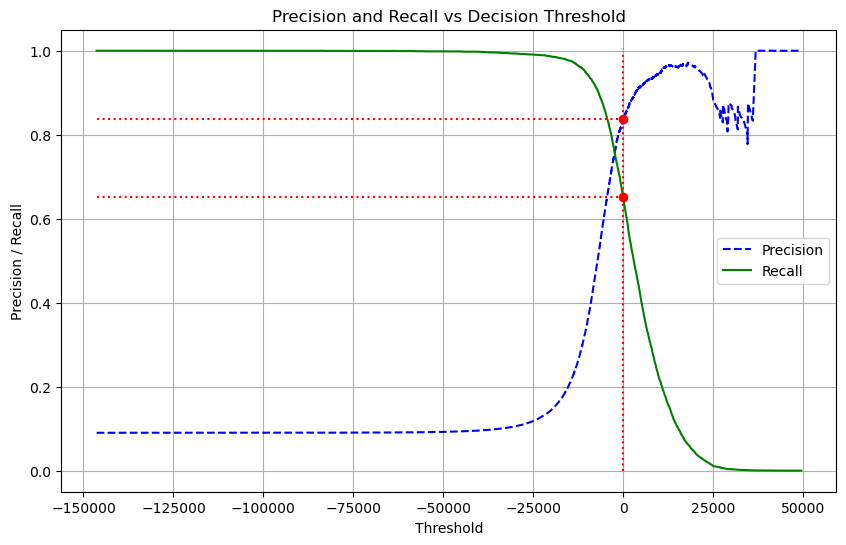

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    # Highlighting a specific threshold (e.g., threshold = 0)
    highlight_threshold = 0  # Set the desired threshold to highlight
    highlight_precision = precisions[(thresholds >= highlight_threshold).argmax()]  # Find corresponding precision
    highlight_recall = recalls[(thresholds >= highlight_threshold).argmax()]  # Find corresponding recall
    
    # Add red dots and dashed lines for the threshold
    plt.plot([highlight_threshold], [highlight_precision], "ro")
    plt.plot([highlight_threshold], [highlight_recall], "ro")
    plt.vlines(x=highlight_threshold, ymin=0, ymax=1, color='red', linestyles='dotted')
    plt.hlines(y=highlight_precision, xmin=thresholds.min(), xmax=highlight_threshold, color='red', linestyles='dotted')
    plt.hlines(y=highlight_recall, xmin=thresholds.min(), xmax=highlight_threshold, color='red', linestyles='dotted')

    # Add labels, title, and legend
    plt.xlabel("Threshold")
    plt.ylabel("Precision / Recall")
    plt.title("Precision and Recall vs Decision Threshold")
    plt.legend(loc="center right")
    
    # Add grid
    plt.grid(True)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

lowest threshold that gives you at least 90% <br>
precision (np.argmax() will give you the first index of the maximum <br>
value, which in this case means the first True value) <br>

In [39]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
threshold_90_precision

3370.0194991439557

To make predictions (on the training set for now), instead of calling the
classifier’s predict() method, you can run this code

In [40]:
y_pred_90 = (y_scores >= threshold_90_precision)

In [41]:
y_pred_90

array([False, False, False, ...,  True, False, False])

Check precision and recall

In [42]:
precision_score(y_train_5, y_pred_90)

0.9000345901072293

In [43]:
recall_score(y_train_5, y_pred_90)

0.4799852425751706

### ROC Curve

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

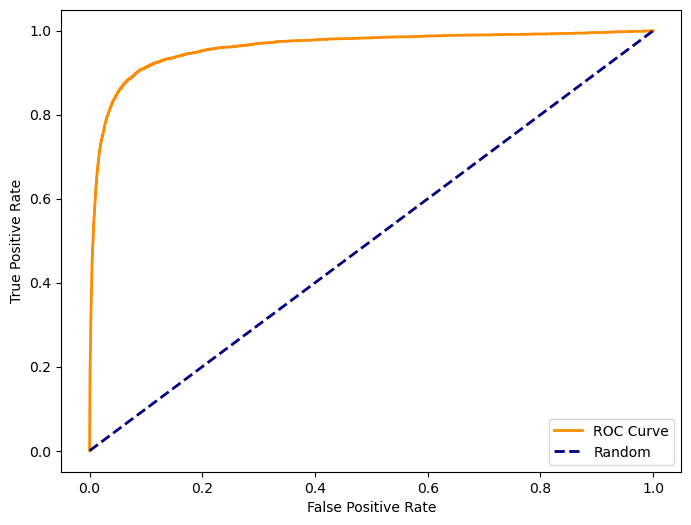

In [45]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

### AUC 

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### Let's compare the roc and auc of `SGDClassifier` with `RandomForestClassifier`

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

The roc_curve() function expects labels and scores, but instead of scores <br>
you can give it class probabilities. Let’s use the positive class’s probability <br>
as the score:

In [48]:
len(y_probas_forest)

60000

In [49]:
y_scores_forest = y_probas_forest[:,1] #2 column probability

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [50]:
# roc_auc_score
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [51]:
len(thresholds_forest)

101

In [52]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [53]:
# precison and recall
y_pred_forest = (y_scores_forest >= .90).astype(int)
# precision score
print("Precision score Random Forest:",precision_score(y_train_5, y_pred_forest))
# recall score
print("Recall score Random Forest",recall_score(y_train_5, y_pred_forest))

Precision score Random Forest: 1.0
Recall score Random Forest 0.3632171186128021


### ROC Curve comparision between `SGDClassifier` and `RandomForesstClassifier`

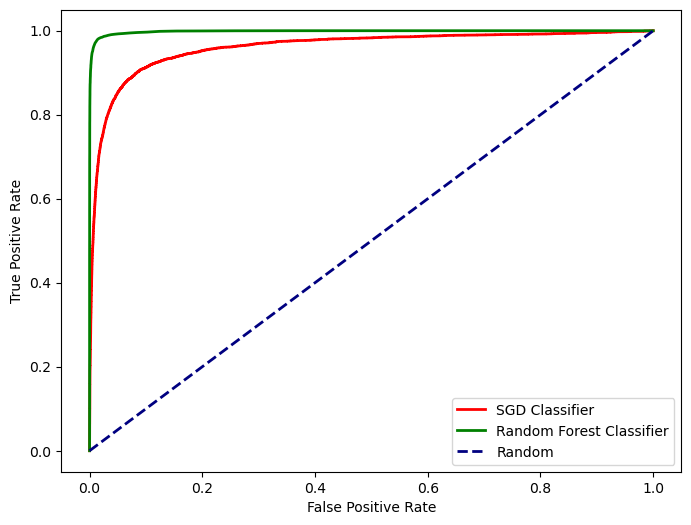

In [54]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', lw=2,
		label=f'SGD Classifier')
plt.plot(fpr_forest, tpr_forest, color='green', lw=2,
		label=f'Random Forest Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

# Multiclass Classification

### SVM Classifier

we are traing the multiclass classifier using binary classifier and OvO(one versus one) it means will be train 45 models. <br>
Page No. `132`

In [55]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)  #using original label with all labels y_train and not y_train_5

SVC()

In [56]:
first_row

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [57]:
svm_clf.predict([first_row])

array([5], dtype=int64)

In [58]:
svm_clf.predict([X_train[25]])

array([2], dtype=int64)

In [59]:
y_train[25]

2

In [60]:
print(y_train[100], svm_clf.predict([X_train[100]]))

5 [5]


In [64]:
first_row_score = svm_clf.decision_function([first_row])
first_row_score

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [65]:
np.argmax(first_row_score)

5

In [67]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Scikit-Learn `OneVsOneClassifier` or `OneVsRestClassifier`

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

In [ ]:
ovr_clf.predict([first_row])

### `SGDClassifier` for MultiClass Classifier

In [70]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [71]:
sgd_clf.predict([first_row])

array([3], dtype=int64)

In [78]:
sgd_clf.decision_function([first_row])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [76]:
sgd_clf.predict([sec_row])

array([0], dtype=int64)

In [77]:
sgd_clf.decision_function([sec_row])

array([[ 14390.59839396, -36919.31719967,  -9811.47434817,
         -8054.56345089, -21825.25725463, -11313.62371972,
        -23649.39025808, -15986.78463914,  -3798.52944589,
        -10635.46503726]])

In [79]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

prediction and confusion matrix

In [87]:
y_pred_sgd = sgd_clf.predict(X_train)

y_pred_sgd

array([3, 0, 4, ..., 5, 6, 8], dtype=int64)

In [90]:
# confusion matrix

conf_mx = confusion_matrix(y_train, y_pred_sgd)
conf_mx

array([[5363,    0,   40,  131,    6,   98,   16,    7,  261,    1],
       [   1, 6482,   16,   74,    1,   10,    8,    8,  136,    6],
       [   5,   58, 4903,  292,   37,   30,   31,   48,  537,   17],
       [   3,    6,   65, 5637,    3,  120,    5,   19,  223,   50],
       [  14,   23,   32,   74, 4650,   50,   18,   40,  361,  580],
       [  17,    4,   31,  422,   32, 4318,   72,   31,  429,   65],
       [  15,    4,   61,   44,   25,   91, 5390,    3,  281,    4],
       [   3,    9,   49,  100,   22,   19,    2, 5671,  122,  268],
       [  13,   39,   28,  223,    6,  214,   13,   12, 5249,   54],
       [  10,    7,   20,  209,   46,   50,    0,  162,  262, 5183]],
      dtype=int64)

<Figure size 800x600 with 0 Axes>

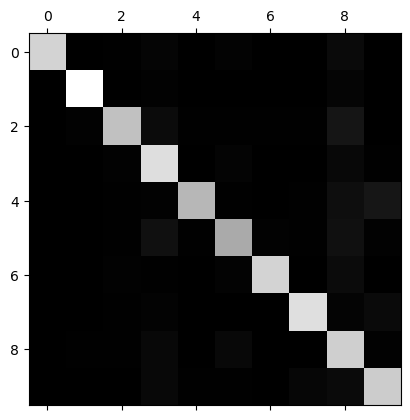

In [96]:
# plotting confusion matrix
plt.figure(figsize=(8,6))
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### Scaling the inputs

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train.astype(np.float64))

In [82]:
cross_val_score(sgd_clf, X_train_scaler, y_train, cv=3, scoring='accuracy')

KeyboardInterrupt: 

# Error Analysis

In [27]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

Rows represent actual classes, while Columns represent predicted classes

<Figure size 1000x800 with 0 Axes>

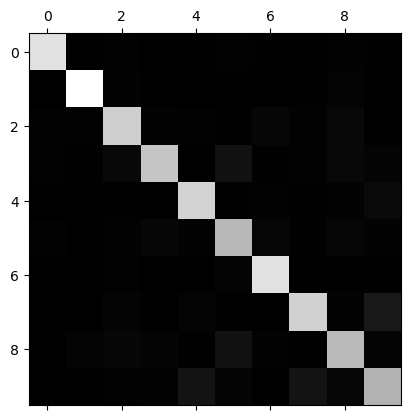

In [35]:
# plot graph

plt.figure(figsize=(10,8))
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

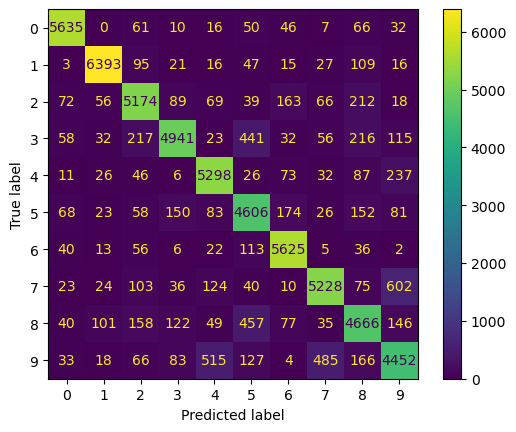

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

Divide each value in the confusion matrix by the number of images in the corresponding class


In [36]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

<Figure size 1000x800 with 0 Axes>

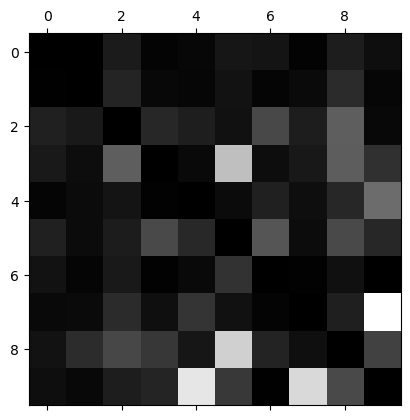

In [40]:
# plot graph

plt.figure(figsize=(10,8))
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

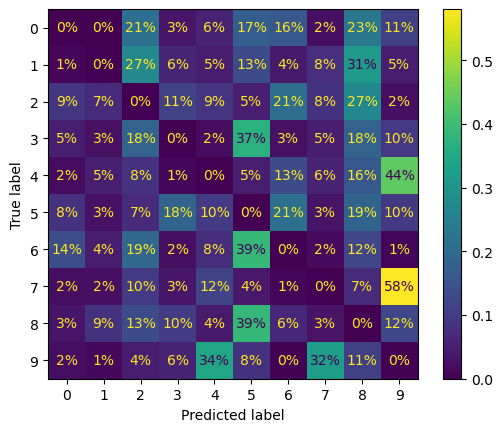

In [43]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()


In [46]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

C:\Users\ask50\AppData\Local\Temp\ipykernel_20820\3000480632.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
C:\Users\ask50\AppData\Local\Temp\ipykernel_20820\3000480632.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
C:\Users\ask50\AppData\Local\Temp\ipykernel_20820\3000480632.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
C:\Users\ask50\AppData\Local\Temp\ipykernel_20820\3000480632.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_bb = X_train[(y_train == cl_b) & (y_train

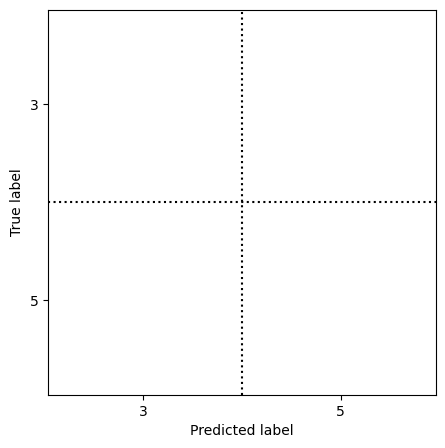

In [48]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
# save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

The prediction gives 2 values 1st:if value is >= 7 2nd: if value is odd or even.

In [53]:
knn_clf.predict([first_row])

array([[False,  True]])

In [54]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [55]:
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9764102655606048

In [57]:
# Lets try with `average`='weighted'

# we got negligible difference as the dataset is well balanced.

f1_score(y_multilabel, y_train_knn_pred, average='weighted')

0.9778357403921755

# Multioutput Classification

Lets add noise to the image

In [59]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_noise = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_noise = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

In [60]:
X_train_noise[0]

array([ 38,  71,  78,  59,  14,  20,  33,  49,  74,  15,   2,  90,  64,
        91,  65,  95,  28,   3,  43,  72,  94,  77,  99,  76,  33,  75,
        24,  40,  11,  77,  68,  73,  12,  73,  20,  98,  80,  49,  40,
        60,  89,  29,  42,   4,   2,  50,  89,  18,  65,  46,  67,  62,
         0,  77,  11,  76,   8,   0,  92,   8,  70,  96,  33,  84,  27,
        23,  55,  36,  99,  90,  53,  85,  89,  18,  56,  37,  48,  53,
        42,  29,  94,  58,  46,  17,  21,  42,  54,  36,  14,  41,  54,
        62,  32,  41,  91,   5,  10,  71,  95,  51,  88,  76,  90,  45,
        36,  59,   0,  67,  16,   2,  78,   2,  13,   8,  67,  56,  90,
        83,  47,  89,  81,  85,  58,  32,  31,  92,  44,  94,  72,  18,
        88,  78,  27,  24,  70,  11,  53,  88,  67,  53,  60,  73,  56,
        42,  51,  27,  73,  68,  75,  96,  43,  49,  65,  87, 107, 105,
       191, 181, 240,  26, 256, 295, 299, 208,  94,   2,  29,  67,  74,
        60,  84,   3,  69,  49,   5,  75,  66,  52, 129, 230, 26

In [62]:
first_noise = X_train_noise[0].reshape(28,28)
first_noise

array([[ 38,  71,  78,  59,  14,  20,  33,  49,  74,  15,   2,  90,  64,
         91,  65,  95,  28,   3,  43,  72,  94,  77,  99,  76,  33,  75,
         24,  40],
       [ 11,  77,  68,  73,  12,  73,  20,  98,  80,  49,  40,  60,  89,
         29,  42,   4,   2,  50,  89,  18,  65,  46,  67,  62,   0,  77,
         11,  76],
       [  8,   0,  92,   8,  70,  96,  33,  84,  27,  23,  55,  36,  99,
         90,  53,  85,  89,  18,  56,  37,  48,  53,  42,  29,  94,  58,
         46,  17],
       [ 21,  42,  54,  36,  14,  41,  54,  62,  32,  41,  91,   5,  10,
         71,  95,  51,  88,  76,  90,  45,  36,  59,   0,  67,  16,   2,
         78,   2],
       [ 13,   8,  67,  56,  90,  83,  47,  89,  81,  85,  58,  32,  31,
         92,  44,  94,  72,  18,  88,  78,  27,  24,  70,  11,  53,  88,
         67,  53],
       [ 60,  73,  56,  42,  51,  27,  73,  68,  75,  96,  43,  49,  65,
         87, 107, 105, 191, 181, 240,  26, 256, 295, 299, 208,  94,   2,
         29,  67],
       [ 7

Noise image Visualization

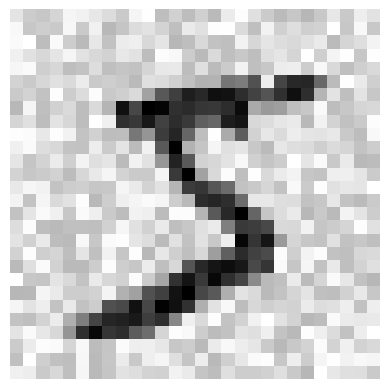

In [63]:
plt.imshow(first_noise, cmap='binary')
plt.axis('off')
plt.show()

Lets Train the model to clean this image

In [64]:
knn_clf.fit(X_train_noise, y_train_mod)

first_mod = knn_clf.predict([X_train_noise[0]])

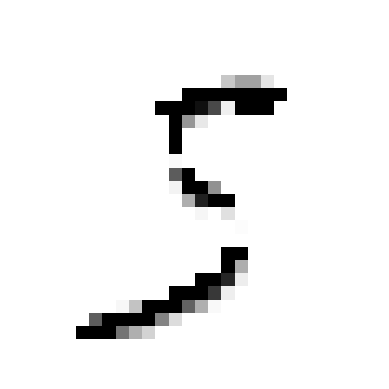

In [65]:
first_mod = first_mod.reshape(28,28)

plt.imshow(first_mod, cmap='binary')
plt.axis('off')
plt.show()

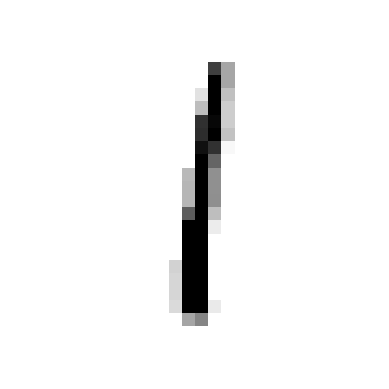

In [67]:
sec_mod = knn_clf.predict([X_train_noise[5500]])

sec_mod = sec_mod.reshape(28,28)

plt.imshow(sec_mod, cmap='binary')
plt.axis('off')
plt.show()